In [23]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Load Datasets, DEF and Daily. Daily_PDM

In [25]:
file_name="TSR_040_DEF.csv"
filepath = os.path.join('data', file_name)
df = pd.read_csv(filepath, delimiter=',')


In [26]:
df.head(10)

,Source,Name,Time,Event_type,Type,Real_Monitor,cod,id,id1,Complete_code,Master,Speed,Depot,Lat,Lon,Lat_umt,Lon_umt,Criticality,Colour
0,711-083,711-083,2020-11-12 06:54:18,ON,PDO,MD,5,5,1,5-5-1,711-083,49,0,45.4395,9.23639,518488.162378,5.031802e+06,0,giallo
1,711-083,711-083,2020-11-12 06:54:18,ON,PDO,MD,5,98,18,5-98-18,711-083,49,0,45.4395,9.23639,518488.162378,5.031802e+06,0,azzurro
2,711-084,710-132,2020-11-12 10:50:09,ON,PDO,MD,5,98,14,5-98-14,711-084,0,0,45.5789,9.15668,512223.798419,5.047274e+06,0,azzurro
3,711-084,710-170,2020-11-12 10:57:17,ON,PDO,MD,5,11,1,5-11-1,711-084,61,0,45.5578,9.16639,512986.210566,5.044931e+06,0,giallo
4,711-084,710-170,2020-11-12 10:57:17,ON,PDO,MD,5,11,3,5-11-3,711-084,61,0,45.5578,9.16639,512986.210566,5.044931e+06,0,giallo
5,711-084,710-170,2020-11-12 11:31:01,ON,PDO,MD,5,5,1,5-5-1,711-084,49,0,0.0000,0.00000,-505646.899516,0.000000e+00,0,giallo
6,711-084,710-132,2020-11-12 11:45:24,ON,PDO,MD,5,35,6,5-35-6,Master Assente,0,0,45.4342,9.23808,518622.081188,5.031214e+06,0,azzurro
7,711-084,710-132,2020-11-12 11:45:24,ON,PDO,MD,5,35,1,5-35-1,Master Assente,0,0,45.4342,9.23808,518622.081188,5.031214e+06,0,azzurro
8,711-084,710-132,2020-11-12 11:45:24,ON,PDO,MD,5,35,3,5-35-3,Master Assente,0,0,45.4342,9.23808,518622.081188,5.031214e+06,0,azzurro
9,711-084,711-084,2020-11-12 12:15:40,ON,PDO,MD,5,98,17,5-98-17,Master Assente,43,0,0.0000,0.00000,-505646.899516,0.000000e+00,0,azzurro


Check the Start-End Time of the Data

In [27]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df = df.dropna(subset=['Time'])

print("Start date:", df['Time'].min())
print("End date:", df['Time'].max())
print("Years available:", sorted(df['Time'].dt.year.unique()))

Start date: 2020-11-12 06:54:18
End date: 2023-09-27 22:25:50
Years available: [np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023)]


Explore Data Points in Each year for data split

In [28]:
# Extract year
df['year'] = df['Time'].dt.year
# Count number of samples per year
year_counts = df['year'].value_counts().sort_index()

print("Number of samples per year:")
print(year_counts)

Number of samples per year:
year
2020     5210
2021    38602
2022    38997
2023    18899
Name: count, dtype: int64


Distrubution of Criticality among components

Criticality      0     1
cod                     
2                0  1380
5            93483  6845
Chi2 = 15887.89, p = 0


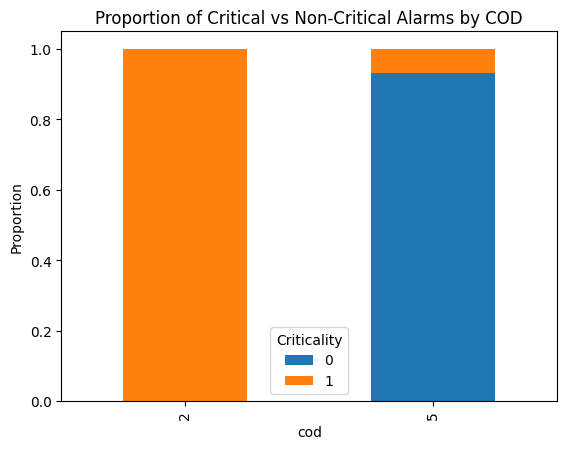

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

df = df.dropna(subset=['cod', 'Criticality'])
df['cod'] = df['cod'].astype(str)
df['Criticality'] = df['Criticality'].astype(int)

# Contingency table
ct = pd.crosstab(df['cod'], df['Criticality'])
print(ct)

# Chi-square test
chi2, p, dof, _ = chi2_contingency(ct)
print(f"Chi2 = {chi2:.2f}, p = {p:.4g}")

# Optional: barplot
ct_norm = ct.div(ct.sum(axis=1), axis=0)
ct_norm.plot(kind='bar', stacked=True)
plt.title("Proportion of Critical vs Non-Critical Alarms by COD")
plt.ylabel("Proportion")
plt.show()

Distribution of Criticality in years

In [8]:
df = df.dropna(subset=['Time', 'Criticality'])

# Add year column
df['year'] = df['Time'].dt.year

# Count the number of samples per class per year
class_dist = df.groupby(['year', 'Criticality']).size().unstack(fill_value=0)

# Add percentages per year
class_percent = class_dist.div(class_dist.sum(axis=1), axis=0) * 100

# Show results
print("Class counts per year:\n", class_dist)
print("\nClass percentages per year:\n", class_percent)

Class counts per year:
 Criticality      0     1
year                    
2020          4924   286
2021         35594  3008
2022         35339  3658
2023         17626  1273

Class percentages per year:
 Criticality          0         1
year                            
2020         94.510557  5.489443
2021         92.207658  7.792342
2022         90.619791  9.380209
2023         93.264194  6.735806


Check if there are missing values

In [9]:
missing_crit_count = df['Criticality'].isna().sum()
print(f"Missing values in 'Criticality': {missing_crit_count}")


Missing values in 'Criticality': 0


Check distribution of Criticality among Event type

In [10]:
pd.crosstab(df['Event_type'], df['Criticality'])


Criticality,0,1
Event_type,,
ON,93483,8225


Distribution among Alert Type

In [11]:
# Create a crosstab of Type vs Criticality
type_crit_crosstab = pd.crosstab(df['Type'], df['Criticality'])

# Calculate criticality rate as a percentage
type_crit_rate = df.groupby('Type')['Criticality'].mean() * 100

# Combine into a single table
type_crit_summary = type_crit_crosstab.copy()
type_crit_summary['Criticality Rate (%)'] = type_crit_rate

# Round and format the values
type_crit_summary = type_crit_summary.rename(columns={0: 'Not Critical (0)', 1: 'Critical (1)'})
type_crit_summary['Criticality Rate (%)'] = type_crit_summary['Criticality Rate (%)'].round(2).astype(str) + '%'

# Reset index to make it look like a table
type_crit_summary = type_crit_summary.reset_index().rename(columns={'Type': 'Alert Type'})

# Display the final table
print(type_crit_summary.to_string(index=False))

  Alert Type  Not Critical (0)  Critical (1) Criticality Rate (%)
         PDO             91514          8225                8.25%
TRAIN_DRIVER               421             0                 0.0%
     WARNING              1548             0                 0.0%


In [12]:
df.describe()

,Time,cod,id,id1,Speed,Depot,Lat,Lon,Lat_umt,Lon_umt,Criticality,year
count,101708,101708.000000,101708.000000,101708.000000,101708.000000,101708.0,101708.000000,101708.000000,101708.000000,1.017080e+05,101708.000000,101708.000000
mean,2022-03-14 19:58:34.505781248,4.959295,40.925227,12.493786,27.733846,0.0,44.372536,8.928938,487197.363054,4.913657e+06,0.080869,2021.703829
min,2020-11-12 06:54:18,2.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,-505646.899516,0.000000e+00,0.000000,2020.000000
25%,2021-07-05 19:00:38,5.000000,7.000000,1.000000,0.000000,0.0,45.360000,9.143640,511283.866773,5.022967e+06,0.000000,2021.000000
50%,2022-03-03 09:28:48,5.000000,31.000000,9.000000,21.000000,0.0,45.469500,9.160210,512516.893859,5.035123e+06,0.000000,2022.000000
75%,2022-10-30 13:03:40,5.000000,98.000000,14.000000,48.000000,0.0,45.541400,9.203060,515909.606588,5.043111e+06,0.000000,2022.000000
max,2023-09-27 22:25:50,5.000000,99.000000,99.000000,122.000000,0.0,45.908400,9.498610,554495.355659,5.106445e+06,1.000000,2023.000000
std,NaN,0.347071,39.956223,19.788542,31.045954,0.0,6.982634,1.408900,156220.781978,7.732334e+05,0.272635,0.826162


Check if any speed value is missing

In [13]:
missing_speed_count = df['Speed'].isna().sum()
print(f"Missing values in 'Speed': {missing_speed_count}")


Missing values in 'Speed': 0


In [14]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Source           0
Name             0
Time             0
Event_type       0
Type             0
Real_Monitor     0
cod              0
id               0
id1              0
Complete_code    0
Master           0
Speed            0
Depot            0
Lat              0
Lon              0
Lat_umt          0
Lon_umt          0
Criticality      0
Colour           0
year             0
dtype: int64


The Dataset Contains 2 Source Heads: 711-084 and 711-083
Below is the distrubution of alert logs per source

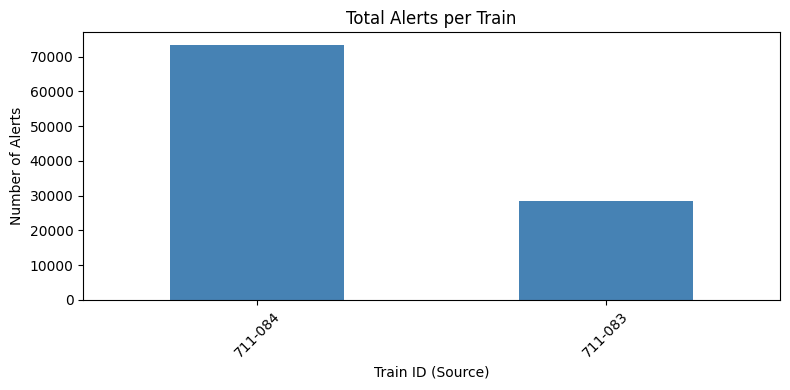

In [15]:
# Group by train ID from the 'Source' column
alerts_per_train = df["Source"].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 4))
alerts_per_train.plot(kind="bar", color="steelblue")
plt.title("Total Alerts per Train")
plt.xlabel("Train ID (Source)")
plt.ylabel("Number of Alerts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Check the distribution of Criticality levels
criticality_counts = df['Criticality'].value_counts()
print("\nCriticality Level Counts:")
print(criticality_counts)


Criticality Level Counts:
Criticality
0    93483
1     8225
Name: count, dtype: int64


Daily Alerts Over Time 

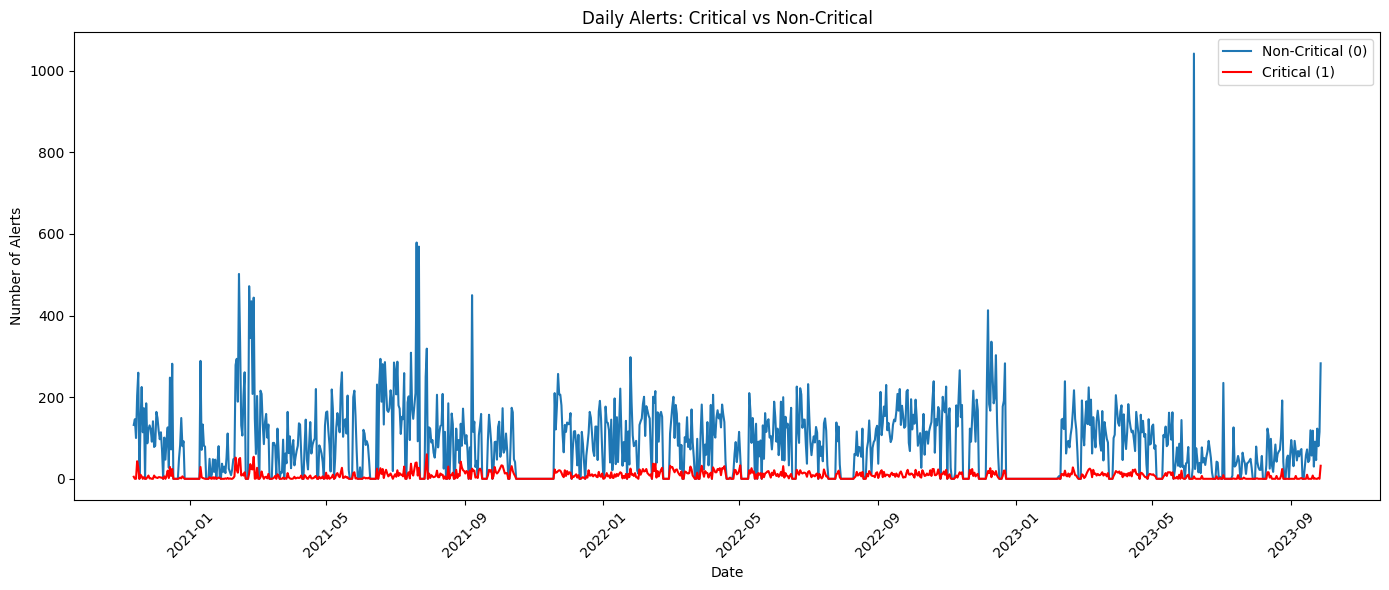

In [17]:
# Load data
df_daily = pd.read_csv('C:/Users/elif.saracoglu/trenord_analysis/data/TSR_040_daily.csv')
df_daily['Time'] = pd.to_datetime(df_daily['Time'])

# Group by day
df_daily_plot = df_daily.set_index("Time").resample("D")[["Criticality_0", "Criticality_1"]].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_daily_plot["Time"], df_daily_plot["Criticality_0"], label="Non-Critical (0)")
plt.plot(df_daily_plot["Time"], df_daily_plot["Criticality_1"], label="Critical (1)", color="red")
plt.title("Daily Alerts: Critical vs Non-Critical")
plt.xlabel("Date")
plt.ylabel("Number of Alerts")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


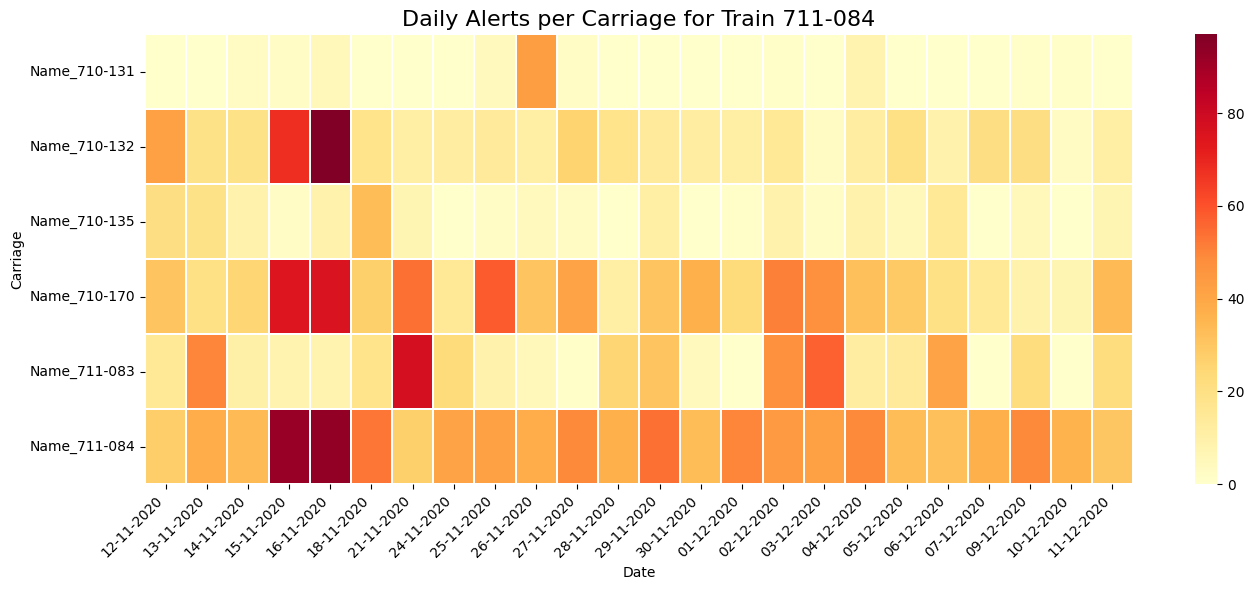

In [18]:
df = pd.read_csv('C:/Users/elif.saracoglu/trenord_analysis/data/TSR_040_daily.csv')
# Convert 'Time' column to datetime
df["Time"] = pd.to_datetime(df["Time"])

# Filter data for train "711-084"
df_filtered = df[df["Source_mode"] == "711-084"] #source mode is the train ID

# Filter for only the first month of available data
first_date = df_filtered["Time"].min()
end_date = first_date + pd.DateOffset(months=1)
df_first_month = df_filtered[df_filtered["Time"] < end_date]

# Identify component columns (wagons)
alert_columns = [col for col in df.columns if col.startswith("Name_")]

# Melt the dataframe to long format
df_melted = df_first_month.melt(
    id_vars=["Time", "Source_mode", "Name_mode"],
    value_vars=alert_columns,
    var_name="Component",
    value_name="Alert_Count"
)

# Group by date and component
df_grouped = df_melted.groupby(["Time", "Component"])["Alert_Count"].sum().reset_index()

# Pivot for heatmap
heatmap_data = df_grouped.pivot(index="Component", columns="Time", values="Alert_Count").fillna(0)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.1)
plt.title("Daily Alerts per Carriage for Train 711-084", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Carriage")
plt.xticks(rotation=45, ha='right')

# Format x-axis to show only day-month-year
ax = plt.gca()
formatted_dates = [
    pd.to_datetime(label.get_text()).strftime('%d-%m-%Y') 
    for label in ax.get_xticklabels()
]
ax.set_xticklabels(formatted_dates, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [19]:
df.head()

,Time,Source_mode,Source_711-083,Source_711-084,Name_mode,Name_710-131,Name_710-132,Name_710-135,Name_710-170,Name_711-083,...,Services,Total_KM,R4_progr_count,RD_progr_count,RP_progr_count,RT_progr_count,VI_progr_count,VIS_progr_count,Sched_maint_progr,Corr_maint_progr
0,2020-11-12,711-084,36,101,710-132,0,42,21,31,15,...,17,324.3,1,0,1,0,2,1,5,6
1,2020-11-13,711-084,69,77,711-083,0,19,19,20,50,...,18,338.4,1,0,1,0,2,1,5,6
2,2020-11-14,711-084,22,78,711-084,3,19,9,25,10,...,17,404.6,1,0,1,0,2,1,5,6
3,2020-11-15,711-084,12,235,711-084,2,68,2,75,8,...,16,402.8,1,0,1,0,2,1,5,6
4,2020-11-16,711-084,22,266,710-132,5,97,9,76,8,...,17,381.1,1,0,1,0,2,1,5,6


C:\Users\elif.saracoglu\AppData\Local\Temp\ipykernel_12716\3578271499.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ts'] = df_filtered['ts'].dt.date


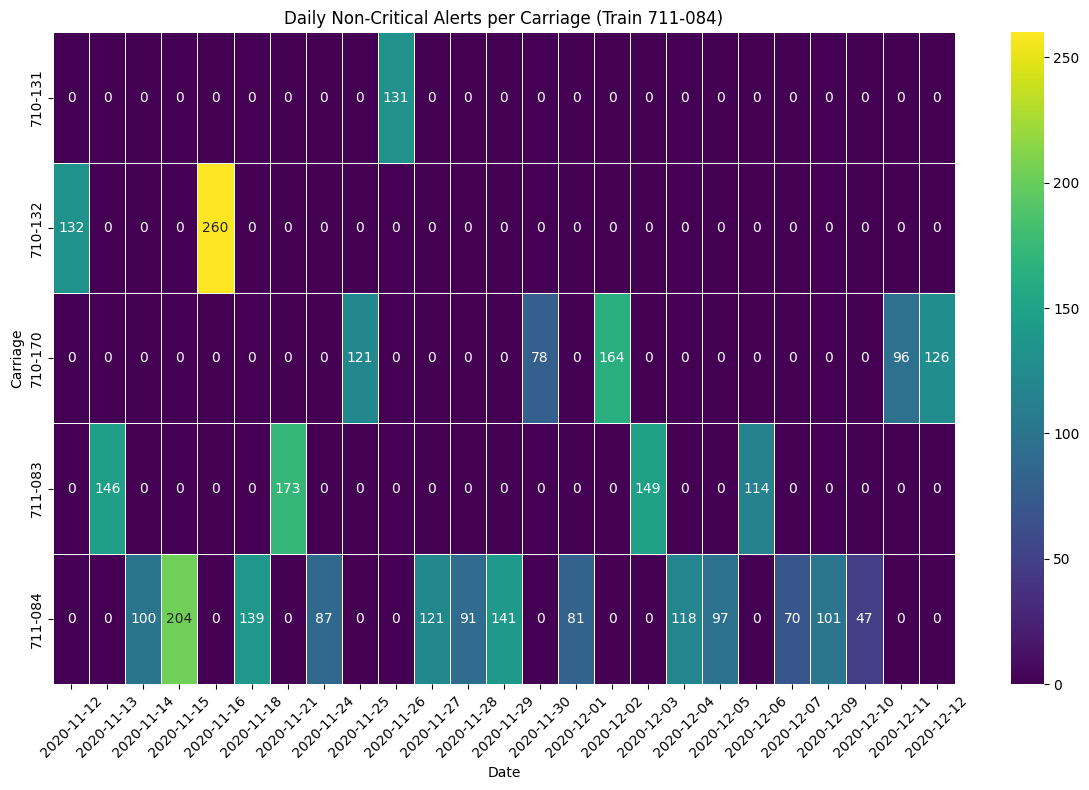

In [20]:
from datetime import timedelta

# Load & preprocess
df = pd.read_csv('C:/Users/elif.saracoglu/trenord_analysis/data/TSR_040_daily.csv')
df = df.rename(columns={
    'Source': 'source', 'Name': 'name', 'Time': 'ts', 'Event_type': 'event_type',
    'Type': 'alert_type', 'Real_Monitor': 'machine_type', 'cod': 'cod', 'id': 'id',
    'id1': 'id1', 'Complete_code': 'complete_code', 'Master': 'master', 'Speed': 'speed',
    'Depot': 'depot', 'Lat': 'lat', 'Lon': 'lon', 'Lat_umt': 'lat_umt', 'Lon_umt': 'lon_umt',
    'Criticality': 'criticality', 'Colour': 'colour'
})

# Filter relevant features and target train
features = ['ts', 'Source_mode', 'Name_mode', 'Criticality_0']
df = df[features]
df['ts'] = pd.to_datetime(df['ts'])
source_value = '711-084'
df_filtered = df[df['Source_mode'] == source_value]

# Restrict to 30-day window
df_filtered['ts'] = df_filtered['ts'].dt.date
start_date = df_filtered['ts'].min()
end_date = start_date + timedelta(days=30)
df_time_restricted = df_filtered[(df_filtered['ts'] >= start_date) & (df_filtered['ts'] <= end_date)]

# Create pivot & plot
pivot_table = df_time_restricted.pivot_table(
    index='Name_mode', columns='ts', values='Criticality_0', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".0f", linewidths=0.5)
plt.title(f'Daily Non-Critical Alerts per Carriage (Train {source_value})')
plt.ylabel('Carriage')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
file_name="TSR_040_daily.csv"
filepath = os.path.join('data', file_name)
df = pd.read_csv(filepath, delimiter=',')

In [22]:
df.head()

,Time,Source_mode,Source_711-083,Source_711-084,Name_mode,Name_710-131,Name_710-132,Name_710-135,Name_710-170,Name_711-083,...,Services,Total_KM,R4_progr_count,RD_progr_count,RP_progr_count,RT_progr_count,VI_progr_count,VIS_progr_count,Sched_maint_progr,Corr_maint_progr
0,2020-11-12,711-084,36,101,710-132,0,42,21,31,15,...,17,324.3,1,0,1,0,2,1,5,6
1,2020-11-13,711-084,69,77,711-083,0,19,19,20,50,...,18,338.4,1,0,1,0,2,1,5,6
2,2020-11-14,711-084,22,78,711-084,3,19,9,25,10,...,17,404.6,1,0,1,0,2,1,5,6
3,2020-11-15,711-084,12,235,711-084,2,68,2,75,8,...,16,402.8,1,0,1,0,2,1,5,6
4,2020-11-16,711-084,22,266,710-132,5,97,9,76,8,...,17,381.1,1,0,1,0,2,1,5,6
